In [88]:
library('igraph')
library('Matrix')
library('pracma')


### Transition Matrix for a Directed Network

In [89]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### random_walk func

In [90]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

### random walk matrix

In [91]:
random_walk_tele = function (g, num_steps, start_node, transition_matrix = NULL, tele, probvec){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        # teleportation
        if (runif(1, 0, 1) < tele)
            v = sample(1:vcount(g), 1)
        probvec[v] = probvec[v] + 1
    }
    
    return(probvec)
}

In [92]:
degreeOfEachNode = function (g){
    degree = c()
    for( v in 1:vcount(g)){
      degree <- append(degree,  degree(g, v , mode = 'in'))
    }
    return(degree)
}

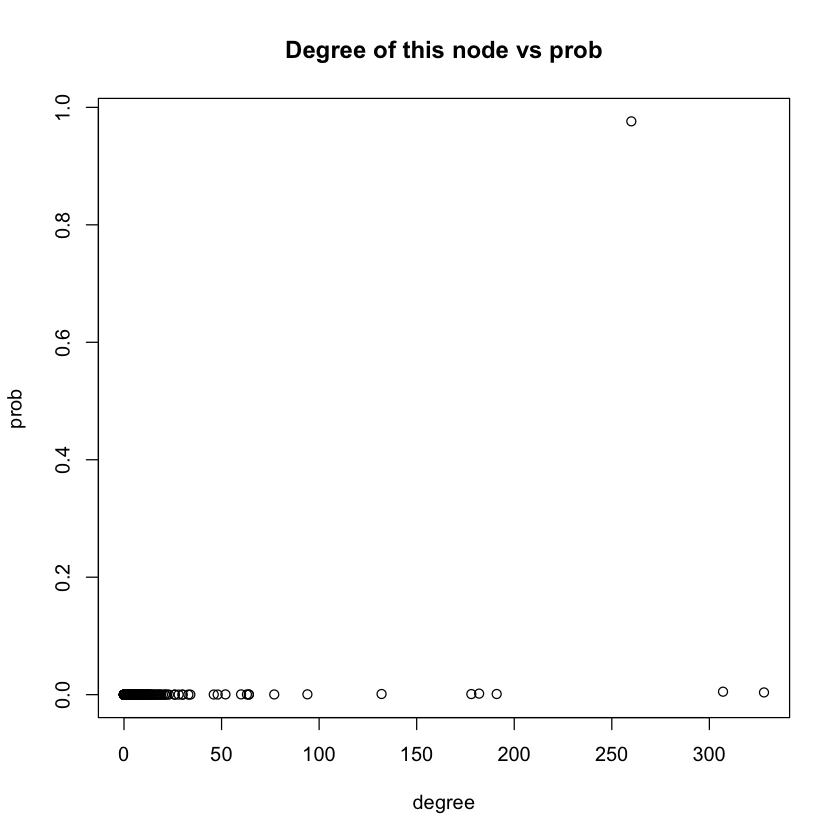

In [93]:
graph  <- barabasi.game(1000, m=4, directed=T)
transition_matrix = create_transition_matrix(graph)
probvec = integer(vcount(graph))
steps = 100
for (start_node in 1:vcount(graph)) {
    probvec = random_walk_tele(graph, steps, start_node, transition_matrix, tele = 0, probvec)
}
prob = probvec / 100000
node_degree = degreeOfEachNode(graph)
# node_degree = degree(g1, mode = 'in')

plot(node_degree, prob, main = 'Degree of node vs prob', xlab = 'degree', ylab = 'prob')
#plot(prob, main = 'prob of visiting each node ', xlab = 'node', ylab = 'prob')

#plot(node_degree, main = 'degree of each node', xlab = 'node', ylab = 'degree')

In [94]:
random_walk_PR = function (g, num_steps, start_node, transition_matrix = NULL, tele, probvec,pr){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        # teleportation
        if (runif(1, 0, 1) < tele)
            v = sample(1:vcount(g), 1, prob=pr)
        probvec[v] = probvec[v] + 1
    }
    
    return(probvec)
}

In [95]:
PRvec = integer(vcount(graph))
for (start_node in 1:vcount(graph)) {
    PRvec = random_walk_tele(graph, steps, start_node, transition_matrix, tele = 0.15, PRvec)
}
PRvec = PRvec / 100000
#plot(node_degree, PRvec, main = 'Degree of this node vs prob', xlab = 'degree', ylab = 'prob')

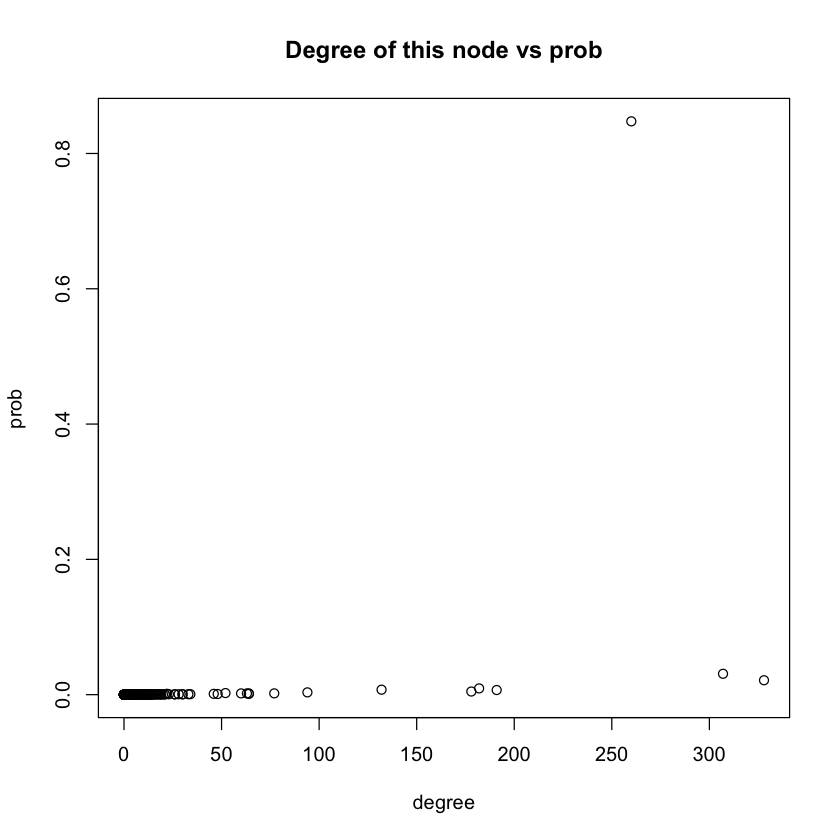

In [96]:
personalPR = integer(vcount(graph))
for (start_node in 1:vcount(graph)) {
    personalPR = random_walk_PR(graph, steps, start_node, transition_matrix, tele = 0.15,personalPR ,PRvec)
}
personalPR = personalPR / 100000
plot(node_degree, personalPR, main = 'Degree of node vs prob', xlab = 'degree', ylab = 'prob')

In [97]:
random_walk_telemedian = function (g, num_steps, start_node, transition_matrix = NULL, tele, probvec, prob){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        # teleportation
        if (runif(1, 0, 1) < tele)
            if (runif(1, 0, 1) <= 0.5)
                v = order(PRvec)[500]
            if (runif(1, 0, 1) > 0.5)
                v = order(PRvec)[501]
        probvec[v] = probvec[v] + 1
    }
    
    return(probvec)
}

In [98]:

degree(graph,503)
degree (graph,529)

[1] 6

[1] 6

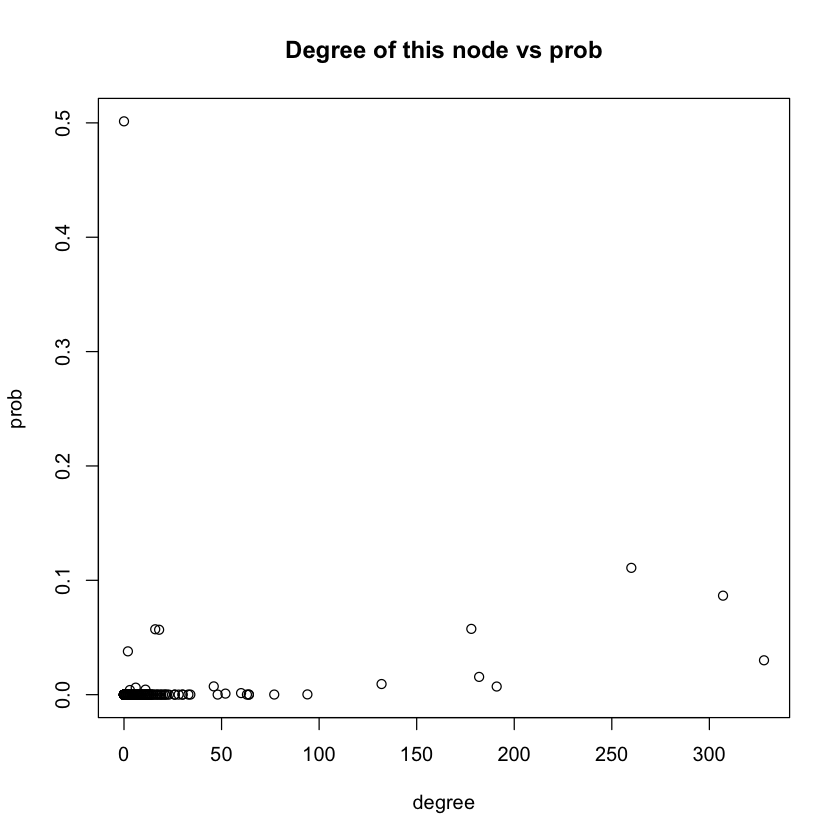

In [99]:
prob4b = integer(vcount(graph))
for (start_node in 1:vcount(graph)) {
    prob4b = random_walk_telemedian(graph, steps, start_node, transition_matrix, tele = 0.15,prob4b ,PRvec)
}
prob4b = prob4b / 100000
plot(node_degree, prob4b, main = 'Degree of node vs prob', xlab = 'degree', ylab = 'prob')

In [100]:
random_walk_top10 = function (g, num_steps, start_node, transition_matrix = NULL, tele, probvec, prob){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    top10 = c()
    top10PR=c()
    for(i in 1:10)
    {
        v1 = order(prob)[1001-i]
        top10 = append(top10,v1)
        top10PR = append(top10PR,(prob[v1]))
    }
    s = sum(top10PR, na.rm=TRUE) 
    for(i in 1:10)
        top10PR[i]=top10PR[i]/s

    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        # teleportation
        if (runif(1, 0, 1) < tele)
            v=sample(top10, 1, prob = top10PR)    
                
        probvec[v] = probvec[v] + 1
    }
    
    return(probvec)
}

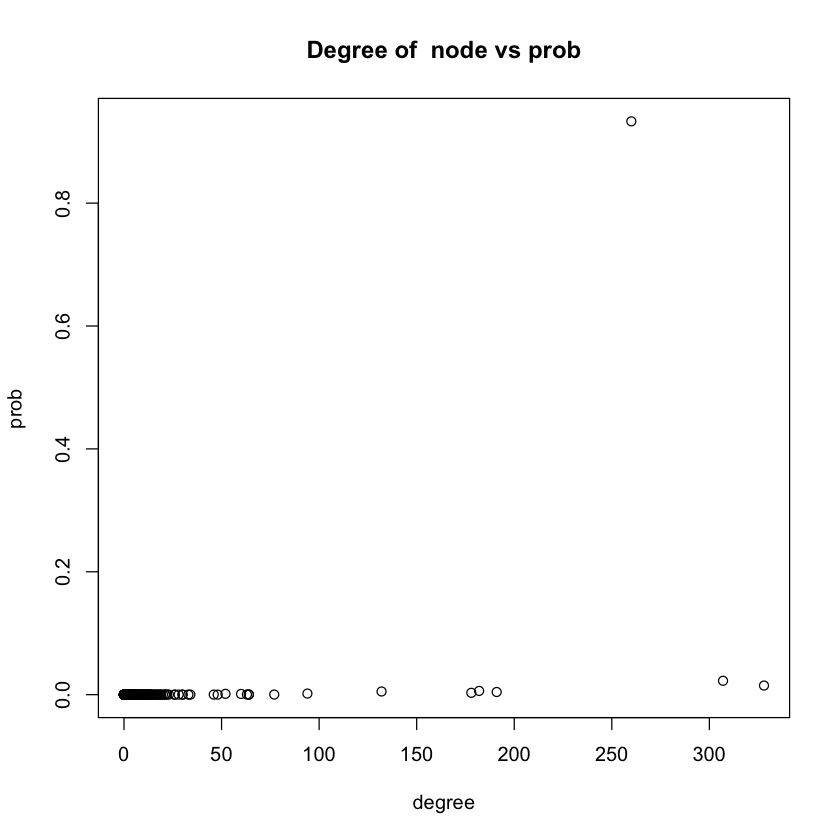

In [101]:
prob4c = integer(vcount(graph))
for (start_node in 1:vcount(graph)) {
    prob4c = random_walk_top10(graph, steps, start_node, transition_matrix, tele = 0.15,prob4c ,PRvec)
}
prob4c = prob4c / 100000
plot(node_degree, prob4c, main = 'Degree of  node vs prob', xlab = 'degree', ylab = 'prob')



In [102]:
tail(sort(PRvec),10)

[1] 0.00461 0.00494 0.00684 0.01082 0.01344 0.01410 0.01836 0.03914 0.05156
[10] 0.58447

In [103]:
top10 = c()
top10PR=c()
top10Deg=c()
    for(i in 1:10)
    {
        v1 = order(PRvec)[1001-i]
        top10 = append(top10,v1)
        top10Deg=append(top10Deg,degree(graph,v1))
        top10PR = append(top10PR,(PRvec[v1]))
    }
    s = sum(top10PR, na.rm=TRUE) 
    for(i in 1:10)
        top10PR[i]=top10PR[i]/s
print(top10PR)
print(top10Deg)

 [1] 0.781084621 0.068904688 0.052306623 0.024536270 0.018843214 0.017961191
 [7] 0.014459828 0.009140963 0.006601807 0.006160795
 [1] 260 308 330 186 195 135 182  98  56  64
